# Analysing Genuine files in dev set - version 2.0 dataset

## TODO

 * Draw scatter plot of posteriors for our best CNN system to project the distribution of genuine and spoofed features
 * Do this for Development and evaluation set.
 * On Evaluation set you could do this plot seperately for different Replay configurations (total 57 will be too much though)

# Summary of file list for spoofed and genuine files in Development set for analysis

## 1) The top 10 genuine confident correctly classified files : high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    Dev file index: 572 0.999953 4.72011e-05 9.96105
    Dev file index: 414 0.999953 4.73798e-05 9.95727
    Dev file index: 575 0.999952 4.80018e-05 9.94422
    Dev file index: 546 0.999948 5.16748e-05 9.87049
    Dev file index: 550 0.999948 5.23234e-05 9.85801
    Dev file index: 426 0.999948 5.23301e-05 9.85789
    Dev file index: 462 0.999945 5.53242e-05 9.80224
    Dev file index: 507 0.999945 5.54301e-05 9.80033
    Dev file index: 530 0.999943 5.73259e-05 9.7667
    Dev file index: 607 0.999941 5.94154e-05 9.7309
    Dev file index: 540 0.999938 6.17601e-05 9.69219
    Dev file index: 619 0.999938 6.1868e-05 9.69044                               
                               

## All genuine files that got score < 0.5

       
       
**** Note when accessing via list or array, index 575 should be called as 574       

In [592]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [559]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run8/predictions/dev_prediction.txt'

In [560]:
all_predictions = []
all_gens = []
all_spoofs = []

with open(pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:760]                    # first 760 files in dev are genuine
all_spf_predictions = all_predictions[760:]                  # files from 761-1710 are spoofed examples

In [561]:
all_scores = []

with open(pred_file) as f:
    all_scores = [line.strip().split(' ')[2] for line in f]
    
all_gen_scores = all_scores[:760]
all_spf_scores = all_scores[760:]

In [562]:
print(len(all_gen_scores))
print(len(all_spf_scores))

760
950


### Sort the genuine indexes

In [563]:
gen_sort_index = np.argsort(all_gen_scores)
gen_sort_index = gen_sort_index[::-1]        # reverse it in descending order

In [564]:
# Get count of all genuine files that score > 0.5 and put it in a list with following format
# file_idx genProb spfProb score

fname='index_file_list/allGenIndexList_TP.txt'
f=open(fname,'w')
count=0
for i in gen_sort_index:    #[0:10]:
    score= all_gen_predictions[i].strip().split(' ')[2]
    if float(score) > 0.5:
        f.write((str(i) + ' ' + str(all_gen_predictions[i]) + '\n'))        
        count += 1
print('Total count = ',count)
f.close()

Total count =  736


## 1) Take the top 10 genuine confident correctly classified files - high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    Dev file index: 572 0.999953 4.72011e-05 9.96105
    Dev file index: 414 0.999953 4.73798e-05 9.95727
    Dev file index: 575 0.999952 4.80018e-05 9.94422
    Dev file index: 546 0.999948 5.16748e-05 9.87049
    Dev file index: 550 0.999948 5.23234e-05 9.85801
    Dev file index: 426 0.999948 5.23301e-05 9.85789
    Dev file index: 462 0.999945 5.53242e-05 9.80224
    Dev file index: 507 0.999945 5.54301e-05 9.80033
    Dev file index: 530 0.999943 5.73259e-05 9.7667
    Dev file index: 607 0.999941 5.94154e-05 9.7309
       
**** Note when accessing via list or array, index 575 should be called as 574       

In [565]:
top10_lowest = gen_sort_index[::-1]

for i in top10_lowest[0:20]:
    print('Dev file index: ' + str(i+1) + ' ' + str(all_gen_predictions[i]))    

Dev file index: 27 0.49145 0.50855 -0.0342036
Dev file index: 285 0.46579 0.53421 -0.137054
Dev file index: 15 0.463603 0.536397 -0.145846
Dev file index: 47 0.453384 0.546616 -0.187008
Dev file index: 4 0.435833 0.564167 -0.25809
Dev file index: 286 0.328668 0.671332 -0.714215
Dev file index: 83 0.321195 0.678805 -0.748286
Dev file index: 289 0.31727 0.68273 -0.766346
Dev file index: 90 0.309738 0.690262 -0.801343
Dev file index: 91 0.300134 0.699866 -0.846661
Dev file index: 284 0.283405 0.716595 -0.927632
Dev file index: 300 0.26959 0.73041 -0.996702
Dev file index: 12 0.269019 0.730981 -0.999606
Dev file index: 290 0.218208 0.781792 -1.27614
Dev file index: 5 0.143625 0.856375 -1.7855
Dev file index: 48 0.0820857 0.917914 -2.41434
Dev file index: 82 0.0666967 0.933303 -2.63858
Dev file index: 89 0.500997 0.499003 0.00398785
Dev file index: 113 0.501411 0.498589 0.00564373
Dev file index: 34 0.564512 0.435488 0.259495


## 2) Take the top 10 genuine confidently misclassified files - low scores

                                     Gen prob     Spf Prob      Log Liklihood ratio
              
               
##### Note when accessing via list or array, index 113 should be called as 112                   

## Analysing Time: The top two components from SLIME - True positive Genuine case

Note, that under time analysis, we have cut our input spectrogram into 10 different temporal components/segments, where each segment correpsonds to

> ***300 mili seconds***

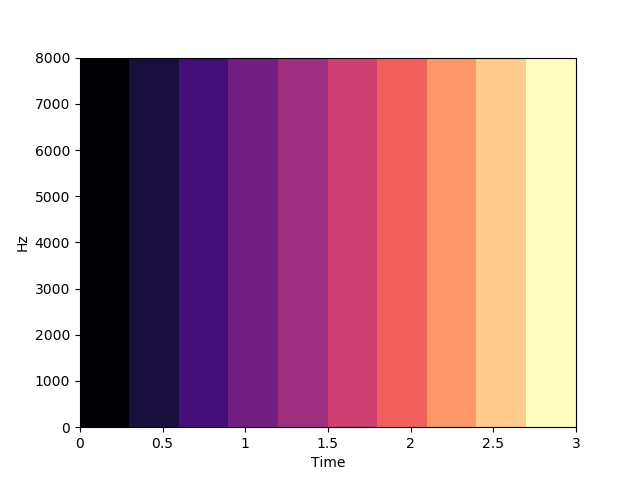

In [596]:
# Show how we cut the spectrogram in timexfrequency

Image("time.png")

In [566]:
file = 'top_two_explanation_indices/time/gen_TP.txt'

In [567]:
def get_top1_top2_list(file):
    with open(file) as f:
        top1 = [int(line.strip().split(' ')[0]) for line in f]
    with open(file) as f:  
        top2 = [int(line.strip().split(' ')[1]) for line in f]
    return top1, top2    

In [568]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [569]:
print(len(top1))
print(len(top2))

736
736


In [570]:
def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

In [571]:
def print_component_distribution(comps, predList, order):
    print('Printing component weigting distribution for Top:', order)
    for i in comps:
        print('Component ' + str(i) + ' : ' + str(get_counts(predList, i)))    

### Using the top1 components - given by SLIME (Time segmentation)

> For ***run1*** we get following distribution:

    Component 1 : 136
    Component 2 : 9
    Component 3 : 62
    Component 4 : 271
    Component 5 : 50
    Component 6 : 119
    Component 7 : 51
    Component 8 : 25
    Component 9 : 3
    Component 10 : 10


In [572]:
comps=[0,1,2,3,4,5,6,7,8,9]    # In time we have 10 segments/components

In [573]:
# Print distribution on top1
order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 136
Component 1 : 9
Component 2 : 62
Component 3 : 271
Component 4 : 50
Component 5 : 119
Component 6 : 51
Component 7 : 25
Component 8 : 3
Component 9 : 10


### Using the top2 components - given by SLIME (Time segmentation)

> For ***Run1*** we get following distribution

    Component 1 : 55
    Component 2 : 17
    Component 3 : 89
    Component 4 : 202
    Component 5 : 103
    Component 6 : 121
    Component 7 : 60
    Component 8 : 39
    Component 9 : 16
    Component 10 : 34

In [574]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 55
Component 1 : 17
Component 2 : 89
Component 3 : 202
Component 4 : 103
Component 5 : 121
Component 6 : 60
Component 7 : 39
Component 8 : 16
Component 9 : 34


From above we see that from 766 genuine TP audio files (that got scores > 0.5) we find that the largest number of times, SLIME gives highest weightage to Component 4 (271 times out of 766). Component 4 corresponds to 900-1200ms audio signal. This is then followed by Component 1 (136) which is the first 300 ms signal.

Similary, from the top2 component distribution above, we see that Component 4 recieves the highest vote. This indicates that may be the CNN is getting maximally activated for this.

 * What to do next?
We now pick those 271 audio files that got top1 as component 4 and try to find if we get some meaningful information 

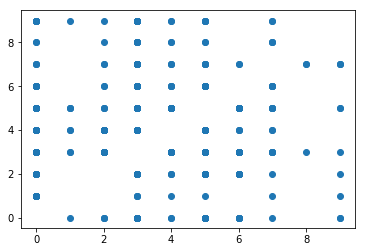

In [575]:
# Just a quick scatter plot

plt.scatter(top1, top2)

In [576]:
# Get those file index having component4 in top explanation

fname='index_file_list/allGenIndexList_TP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
    
# Write the top component index to the file and further analysis
#fname='topExplanation_list_Genuine_TP.txt'
fname='top_two_explanation_indices/time/topExplanation_list_gen_TP.txt'
id4_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==3:    # if top explanation index is 3 (which is actually 4)
        id4_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

### Note: 
> the file topExplanation_list_gen_TP.txt will have four columns
> The first column denotes file index (index from 0), second and third specifies genuine and spoofed probability, while last specifies the LLR score

### What have we done so far

 1. We took all genuine files that were correctly classified by CNN. We took 0.5 as score threshold to further filter the genuine files and get 766 genuine TP audio files.
 1. Then we applied SLIME. We segmented along time. We partitioned these files in 10 parts, each of 300ms. We then obtained top 2 influencing component index for all these 766 files.
 1. We then analysed the explanation index distribution for these 766 files and find that the component 4 that corresponds to 900-1200ms audio are maximally activated (got highest count = 271/766)
 1. Then we take these 271 audio file index and plot their spectrograms and try to find similarity.


## Analysing Freq: The top two components from SLIME - True positive Genuine case

Note, that under frequency analysis, we have cut our input spectrogram into 8 different frequency components/segments, where each segment correpsonds to

> ***1000 Hz frequency***

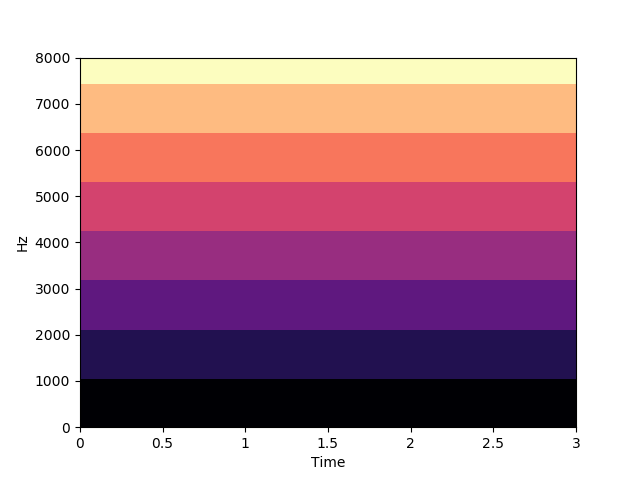

In [594]:
# Show how we cut the spectrogram in timexfrequency

Image("frequency.png")

In [577]:
file = 'top_two_explanation_indices/freq/gen_TP.txt'

In [578]:
%%bash
cat 'top_two_explanation_indices/freq/gen_TP.txt' | head

# the top two components 7 6 dominates the explanation

7 6
7 6
7 6
7 6
7 6
7 6
7 6
7 6
7 6
7 6


In [579]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [580]:
print(len(top1))
print(len(top2))

736
736


## Top 1 component distribution - Frequency

In [581]:
comps = [0,1,2,3,4,5,6,7]   # in Frequency we have 8 components

In [582]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 13
Component 1 : 0
Component 2 : 0
Component 3 : 0
Component 4 : 0
Component 5 : 61
Component 6 : 6
Component 7 : 656


## Top 2 component distribution - Frequency

In [583]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 51
Component 1 : 3
Component 2 : 2
Component 3 : 2
Component 4 : 50
Component 5 : 273
Component 6 : 294
Component 7 : 61


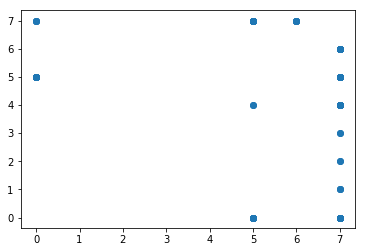

In [584]:
# Just a quick scatter plot

plt.scatter(top1, top2)

In [585]:
# Get those file index having component8 in top explanation (as for frequency we get top explanation at index8)
top = 7

fname='index_file_list/allGenIndexList_TP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
#Write the top component index to the file and further analysis
fname='top_two_explanation_indices/freq/topExplanation_list_gen_TP.txt'
id8_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==top:    # if top explanation index is 3 (which is actually 4)
        id8_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

** Observations**

> We find that frequency component 8 corresponding to 7000-8000 Hz, seems to get maximally activated for making the prediction. Still, its hard to make any signifant conclusion about a class.

> What has the CNN learned about the genuine and spoofed classes?


## Analysing timexFreq: The top two components from SLIME - True positive Genuine case

Note, that under timexfrequency analysis, we have cut our input spectrogram into 30 different segments, where each segment correpsonds to

> ***600 msec in time and around 1333 Hz in frequency***

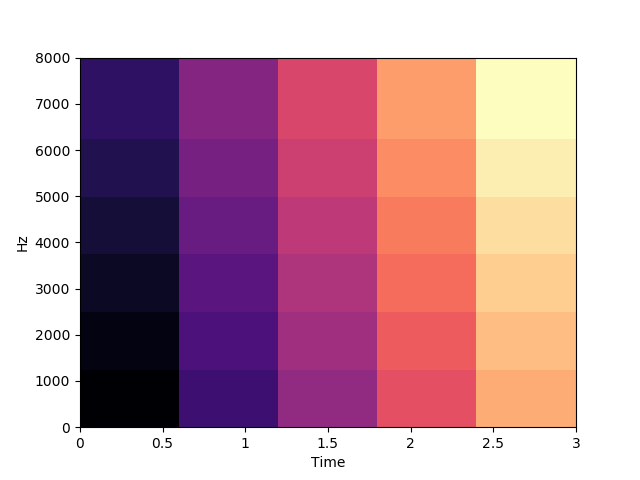

In [595]:
# Show how we cut the spectrogram in timexfrequency

Image("timexfrequency.png")

In [586]:
file = 'top_two_explanation_indices/tf/gen_TP.txt'

In [587]:
%%bash
cat 'top_two_explanation_indices/tf/gen_TP.txt' | grep 17 | wc -l

# the indexes 11,23 and 17 seems to be appearing mostly
# Index 11 occuring - 498 times (in top2)
# Index 23 occurs 204 times in top2 pair
# Index 17 appears 394 times in top2 pair

394


#### quick note

>  Along timexfrequency analysis, the indexes 11,23 and 17 seems to be appearing mostly, where,

 1. Index 11 occuring - 498 times (in top2)
 1. Index 17 appears 394 times in top2 pair
 1. Index 23 occurs 204 times in top2 pair
 
** Note ** Indexes starts with 0, so 11 here is 12th component 

In [588]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)
print(len(top1))
print(len(top2))

736
736


## Top 1 component distribution - time x Frequency

In [589]:
comps = np.arange(0,30)   # in timexfrequency we have 30 components

In [590]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 68
Component 1 : 0
Component 2 : 0
Component 3 : 0
Component 4 : 43
Component 5 : 1
Component 6 : 0
Component 7 : 0
Component 8 : 0
Component 9 : 0
Component 10 : 4
Component 11 : 333
Component 12 : 0
Component 13 : 0
Component 14 : 0
Component 15 : 0
Component 16 : 3
Component 17 : 193
Component 18 : 0
Component 19 : 0
Component 20 : 0
Component 21 : 0
Component 22 : 2
Component 23 : 84
Component 24 : 0
Component 25 : 0
Component 26 : 0
Component 27 : 0
Component 28 : 0
Component 29 : 5


## Top 2 component distribution - time x Frequency

In [591]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 78
Component 1 : 0
Component 2 : 1
Component 3 : 0
Component 4 : 89
Component 5 : 2
Component 6 : 0
Component 7 : 0
Component 8 : 0
Component 9 : 0
Component 10 : 14
Component 11 : 165
Component 12 : 0
Component 13 : 0
Component 14 : 0
Component 15 : 0
Component 16 : 4
Component 17 : 201
Component 18 : 0
Component 19 : 0
Component 20 : 0
Component 21 : 0
Component 22 : 12
Component 23 : 120
Component 24 : 7
Component 25 : 1
Component 26 : 0
Component 27 : 0
Component 28 : 5
Component 29 : 37


**Observations**

> It seems that under timexfrequency analysis, considering 766 genuine audio files in development set (True positive, that got scores > 0.5) the decision is highly influenced for ***Components 11,17 and 23.***

# Overall Summary from this study

**Time segmentation**

>We segmented spectrogram into 10 super-samples (components), each of 1000ms, and ran SLIME to generate explanations using 5000 samples. We find that among 766 True-positive genuine files (with score > 0.5), the highest influence is shown for component 4 that corresponds to 4000ms.

**Frequency segmentation**
> We segmented the spectrograms into 8 different frequency bins, each corresponding to 1000Hz and ran SLIME. In this case, the top explanation favours to the highest frequency bin (8000hz)/. Out of 766 TP genuine examples we get 656 corresponding to bin 8 (8000Hz). This suggest that the genuine class is highly influenced by higher frequency.

> ***This is a bit surprising though as I was expecting this behaviour for spoofed cases.***

**TimexFrequency segmentation**
> We segmented the spectrogram into 30 different timexfrequency bins. We chose 30 to keep our analysis simple. Each component corresponds to 600 msec in time and around 1333 Hz in frequency. Here, we find that the components 11 and 17 are highly contributing in prediction. Component 11 corresponds to 
 